
 
<CENTER>  <B> <U> PROJET 4 : Régression en grande dimension et sparsité </U> </B></CENTER>

<P><U><B> Exercice 1 :</B></U>   <B>Régularisation </B> </P>

<P> <B>Question 1 : </B> </P>
<P>Supposons que l'on observe le modèle linéaire <i> Y=X&beta;+ &eta;</i>, avec &eta; un vecteur gaussien standard de dimension <i>n = 1000, &beta;</i> un vecteur de dimension <i>p = 5000</i> tel que :   </P>


<P><CENTER><i> &beta;<sub>1</sub>=...=&beta;<sub>15</sub>=1 </i></CENTER></P>
<P> Les autres coordonnées sont nulles. On suppose ici que les colonnes de la martice X sont i.i.d gaussiens standards.</P>

<P> <U>But:</U>  Comparaison des estimateurs Lasso, Ridge et Elastic-Net </P>

<P> <B>Partie A : </B> Estimer le vecteur de regression par la méthode Elastic-Net pour toutes les valeurs de &alpha; dans {0, 0.1, ... , 0.9, 1}  </P>




In [1]:
from math import *
from random import*
from numpy import *
from pylab import *
from sklearn.linear_model import ElasticNet
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 1- Initialisation

n=1000
p=5000
s=15

# BETA
beta=[]
beta.extend(ones(15))
beta.extend(zeros(p-15))

# ETA
eta=[gauss(0,1) for i in range(n)]
# X
X=[[gauss(0,1) for i in range(p)]for j in range(n)]
X=mat(X)


print(shape(X))
print(shape(beta))
print(shape(eta))



# Y

Y=zeros(n)
#Y=X*(transpose(beta))+eta
S=zeros(n)
for i in range(n): 
    for j in range(p):
        S[i]=X[i,j]*beta[j]+S[i]
    
    Y[i]=S[i]+eta[i]
    



# 2-  Partage de nos données en base d'apprentissate et base test 

X_train = X[0:int(n*2/3)]
X_test = X[int(n*2/3):n]

Y_train = Y[0:int(n*2/3)]
Y_test = Y[int(n*2/3):n]
   



(1000, 5000)
(5000,)
(1000,)


In [4]:
X_train

matrix([[-1.15696251, -0.51036953,  0.54907456, ..., -0.9707457 ,
         -0.0564487 ,  1.78035894],
        [-0.72581268, -1.3761441 , -0.8809242 , ...,  0.06245674,
          1.02666169,  0.0616348 ],
        [ 1.62172467, -0.71339629, -0.07827793, ..., -0.33642968,
         -0.59640152,  0.51276452],
        ...,
        [ 1.55523905, -0.61152939, -0.26906528, ...,  1.77384798,
          0.54880155,  0.02593045],
        [-1.04466411, -0.51447487,  0.73361846, ...,  1.10741171,
          0.71361492,  0.99361578],
        [-0.68205584,  1.97353111,  0.76247875, ...,  0.41203495,
          1.75693541,  0.94271782]])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


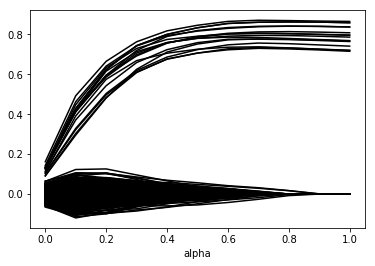

In [5]:
# 3- Création de Alpha

alpha=arange(0,1.1,0.1)
print(alpha)


stock_pred=zeros([len(alpha),n-int(n*2/3)])
beta_coef=zeros([len(alpha),p])
intercept=zeros(len(alpha))

# 4- Application de la fonction ElasticNet pour différentes valeurs de Alpha et pour lambda=0.2
# Création de notre modèle d'apprentissage grace à est.fit(X_train,Y_train) et application dans la base test predict(X_test) 
# Puis on stock les valeurs prédites dans stock_pred, les valeurs des coef beta dans beta_coef et les ordonnées à l'origine.
for i in range(len(alpha)) : 
    est = ElasticNet(l1_ratio=alpha[i], alpha=0.2)
    y_pred_est=est.fit(X_train,Y_train).predict(X_test)
    stock_pred[i]=y_pred_est
    beta_coef[i]=est.coef_  
    intercept[i]=est.intercept_
    #print(y_pred_est)  
    
# 5- On trace les valeurs des Betas en fonction des différentes valeurs de alpha dans  [0,1]   
plt.plot(alpha,beta_coef[:,0], color="black" )
for i in range(p) : 
    plt.plot(alpha,beta_coef[:,i], color="black" )
    plt.xlabel('alpha')
plt.show()


<P> <U>Observation:</U>   Avec la fonction Elastic-Net et lambda=0.2, quand la valeur de Alpha tend vers 1 nous remarquons que nous avons  15 &beta; qui vont tendre vers environ 1 et le reste vers 0 ce qui est en accord avec notre jeu de données.   </P>
<P> </P> 
<P> <B>Partie B : </B> Chemin de régularisation avec Lasso</P>

C:\Users\yousra\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
C:\Users\yousra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


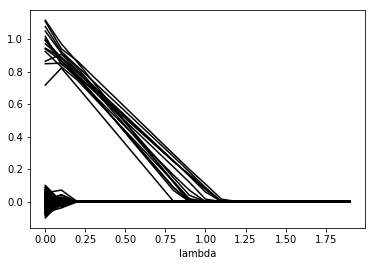

In [80]:
# 1- Création de Lambda
lamda=arange(0,2,0.1)

beta_coef=zeros([len(lamda),p])


# 2- Ici nous faisons pareil que pour la partie A mais cette fois si alpha est fixé à 1 (LASSO) et c'est lambda qui est variable
for i in range(len(lamda)) : 
    est = ElasticNet(l1_ratio=1, alpha=lamda[i])
    y_pred_est=est.fit(X_train,Y_train).predict(X_test)
    beta_coef[i]=est.coef_  
    
# 3- On trace les valeurs des Betas en fonction des différentes valeurs de lambda dans  ]0,2]   
for i in range(p) : 
    plt.plot(lamda,beta_coef[:,i], color="black" )
    plt.xlabel('lambda')
plt.show()

<P> <U>Observation:</U>   Avec Lasso (alpha=1), quand la valeur de lambda tend vers l'infini nous remarquons que les valeurs de  &beta; tendent tous vers 0. La valeur optimale de Lambda pour que l'on soit en accord avec notre jeu de données serait aux alentours de  0.2 pour LASSO.</P>


<P> </P> 
<P> <B>Partie C : </B> En utilisant seulement l'échantillon d'apprentissage, nous cherchons  dans la suite à déterminer les  valeurs optimales des paramètres de régularisation pour les 3 méthodes.</P>

<P> <B>  <U>Application:</U>  Méthode de Validation Croisée </B> </P> 

Lasso :


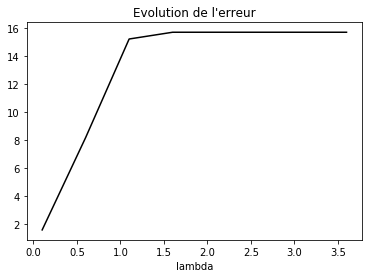

0.1
Ridge : 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/pyth

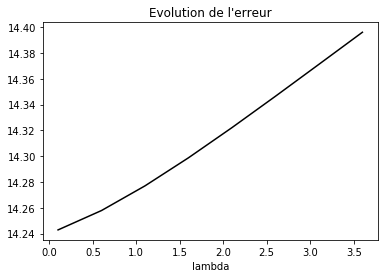

0.1
Elastic net :


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/pyth

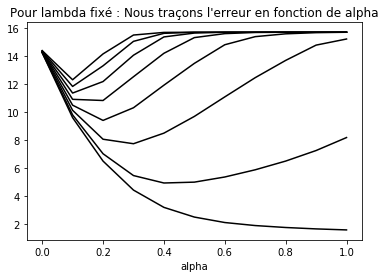

80


In [6]:

# 1 - Création de la fonction de prediction 
def f_pred(alpha1,lamda1,X,Y,X_t) :
    y_pred_est=[]
    est = ElasticNet(l1_ratio=alpha1, alpha=lamda1)
    y_pred_est=est.fit(X,Y).predict(X_t)
    return y_pred_est ;

# 2 - Création de la méthode de validation croisée

def val_crois(alpha1,lamda1,X,Y,K): 
    #Lon=prend la valeur égale à longueur de Y
    lon = len(Y)
    #nb donne le nombre de bloc, attention il doit etre integer 
    nb = int(lon/K)
    S = 0.0
    for i in range(nb):
        
        X_train1 = X[0:i*K]
        X_train2 = X[(i+1)*K:lon]  
        X_train=append(X_train1,X_train2,axis=0)
        
        Y_train1 = Y[0:i*K]  
        Y_train2 = Y[(i+1)*K:lon] 
        Y_train=append(Y_train1,Y_train2,axis=0)
        
        X_test = X[i*K:(i+1)*K] 
        Y_test = Y[i*K:(i+1)*K] 
        est = f_pred(alpha1,lamda1,X_train,Y_train,X_test) # création de l'estimateur sur les echantillons X_train et Y_train
        # et calcul sur l'echatillon X_train
        
        err = [pow(pred - obs,2) for pred, obs in zip(est, Y_test)] # calcul des erreurs obtenue entre prediction et observé
        S = S + sum(err)/len(err) # somme des erreurs moyennes
    return S/nb # moyenne des erreurs moyennes


# 3 - Création des fonctions de selection de modele pour Lasso , Ridge et Elastic-Net
 
# selection de model Lasso
def model_select_L(X,Y,K): 
    lamda1=arange(0.1,4,0.5)
    alpha=1
    err_est = [val_crois(alpha,lamda,X,Y,K) for lamda in lamda1]
    plt.title("Evolution de l'erreur")
    plt.plot(lamda1,err_est, color="black" )
    plt.xlabel('lambda')
    plt.show()
    return lamda1[argmin(err_est)] 
### ICI pour lasso cette fonction nous donne la valeur optimale entre les différentes valeurs de lambda testées.


# selection de model Ridge
def model_select_R(X,Y,K):  
    lamda1=arange(0.1,4,0.5)
    alpha=0
    err_est = [val_crois(alpha,lamda,X,Y,K) for lamda in lamda1]
    plt.title("Evolution de l'erreur")
    plt.plot(lamda1,err_est, color="black" )
    plt.xlabel('lambda')
    plt.show()
    return lamda1[argmin(err_est)]
### ICI pour Rdige cette fonction nous donne la valeur optimale entre les différentes valeurs de lambda testées.


# selection de model Elastic net 
def model_select_EN(X,Y,K):  
    lamda1=arange(0.1,4,0.5)
    alpha1=arange(0,1.1,0.1)
    err_est = [[val_crois(alpha,lamda,X,Y,K) for lamda in lamda1] for alpha in alpha1 ]
    plt.title("Pour lambda fixé : Nous traçons l'erreur en fonction de alpha")
    plt.plot(alpha1,err_est, color="black" )
    plt.xlabel('alpha')
    plt.show()
    return argmin(err_est)
### ICI pour Elastic-Net cette fonction nous donne la position des deux valeurs optimales
# entre les différentes valeurs de lambda et alpha testées.


print('Lasso :')
print(model_select_L(X_train,Y_train,200))

print('Ridge : ')

print(model_select_R(X_train,Y_train,200))

print('Elastic net :')

print(model_select_EN(X_train,Y_train,200))




<P> <U>Remarque:</U> Pour les 3 fonctions de selection de modèle, les deux premières nous donnent la valeur du paramètre optimal alors que pour l'Elastic Net, nous avons en sortie la position des deux valeurs optimales. </P>


Pour l'estimateur NG : la selection de modèle nous a sortie que l'argmin des erreur est de 80. 
Dans notre code nous avons créé la matrice des erreurs en fonction de la matrice des coefficients suivants : 

Position de matrice 
<p><pre>Lambda =    0.1     0.6   1.1   1.6   2.1   2.6   3.1  3.6</pre></p>
<p>Alpha</p>
<p><pre>    0  </pre></p>
<p><pre>    0.1</pre></p>
<p><pre>    0.2</pre></p>
<p><pre>    0.3</pre></p>
<p><pre>    0.4</pre></p>
<p><pre>    0.5</pre></p>
<p><pre>    0.6</pre></p>
<p><pre>    0.7</pre></p>
<p><pre>    0.8</pre></p>
<p><pre>    0.9                                                80</pre></p>
<p><pre>    1                                                  88</pre></p>

Donc les paramètres optimaux de la fonction Elastic Net qui permettent de  minimumiser  les erreurs est alpha=0.9 avec lambda=3.6 ce qui est cohérent avec notre graphique.


<P> </P> 
<P> <B>Partie D : </B> Après avoir selectionné les paramètres optimaux pour les 3 estimateurs, nous voulons savoir lequel de ces estimateurs est le meilleur et donc celui qui fournit la meilleur prédiction sur l'échantillon test. </P>




In [89]:
# 1 - Fonction qui donne l'erreur de prediction
def erreur(Y_pred,Y_train) : 
    err = [pow(pred - obs,2) for pred, obs in zip(Y_pred, Y_train)] # calcul des erreurs obtenue entre prediction et observé
    err_m=sum(err)/len(err) # somme des erreurs moyennes
    return err_m ; 

# 2 - Application de la fonction erreur pour les 3 estiameurs avec les paramètres optimaux
print('Lasso :')
print(erreur(f_pred(1,0.1,X_train,Y_train,X_test),Y_test))


print('Ridge :')

print(erreur(f_pred(0,3.1,X_train,Y_train,X_test),Y_test))

print('Elastic net :')
print(erreur(f_pred(0.9,3.6,X_train,Y_train,X_test),Y_test))


Lasso :
1.26196217661
Ridge :
13.5887299061
Elastic net :
15.3032801318


C:\Users\yousra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<P> <U>Observation:</U>  Après execution de la fonction erreur nous obervons que pour notre jeu de données la fonction Lasso est bien meilleur avec une erreur moyenne de 1.26   </P>
<P> </P> 
<P> </P> 
<P> </P> 
<P> <B> Question 2 : </B> Refaire le même raisonnement avec cette fois ci 

</P>

<P><CENTER><i> &beta;<sub>1</sub>=...=&beta;<sub>1500</sub>=1 </i></CENTER></P>




In [90]:
# 1- Initialisation
n=1000
p=5000
s=1500

# - Beta
beta=[]
beta.extend(ones(s))
beta.extend(zeros(p-s))
# - Eta
eta=[gauss(0,1) for i in range(n)]

# - X
X=[[gauss(0,1) for i in range(p)]for j in range(n)]
X=mat(X)


print(shape(X))
print(shape(beta))
print(shape(eta))



# - Y

Y=zeros(n)
#Y=X*(transpose(beta))+eta
S=zeros(n)
for i in range(n): 
    for j in range(p):
        S[i]=X[i,j]*beta[j]+S[i]
    
    Y[i]=S[i]+eta[i]
    



# 2 - Partage en échantillon test et échantillon d'apprentissage 

X_train = X[0:int(n*2/3)]
X_test = X[int(n*2/3):n]
Y_train = Y[0:int(n*2/3)]
Y_test = Y[int(n*2/3):n]




(1000, 5000)
(5000,)
(1000,)


<P> <B> Partie A  </B> </P>


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


C:\Users\yousra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


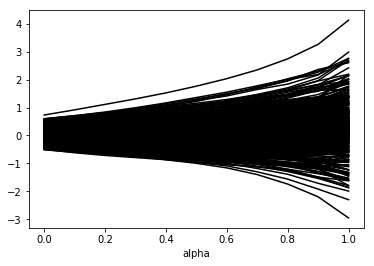

In [85]:
# 1 - Création du vecteur alpha 

alpha=arange(0,1.1,0.1)
print(alpha)

# 2 - initialisation  des Beta

beta_coef=zeros([len(alpha),p])



for i in range(len(alpha)) : 
    est = ElasticNet(l1_ratio=alpha[i], alpha=1)
    y_pred_est=est.fit(X_train,Y_train).predict(X_test)
    beta_coef[i]=est.coef_  




# 3- On trace les valeurs des Betas en fonction des différentes valeurs de alpha dans  [0,1]  
plt.plot(alpha,beta_coef[:,0], color="black" )
for i in range(p) : 
    plt.plot(alpha,beta_coef[:,i], color="black" )
    plt.xlabel('alpha')
    
plt.show()

<P> <U>Observation:</U>   Nous oberservons ici que avec lambda=1, lorsque alpha tend vers 1 les valeurs des &Beta; sont entre -3 et 4 ce qui n'est pas en accord avec notre jeu de données. Pour avoir une meilleur estimation des &Beta; il faudrait avoir  alpha qui  se rapporche de 0.    </P>


<P> </P> 
<P> <B>Partie B : </B> Chemin de régularisation du Lasso </P>


C:\Users\yousra\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\yousra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


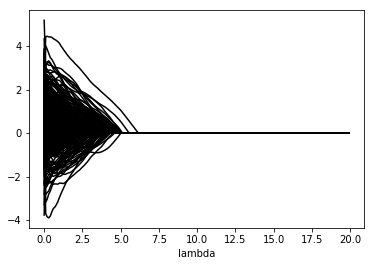

In [86]:

    
# 1- Création de Lambda
lamda=arange(0,20,0.1)
beta_coef=zeros([len(lamda),p])


# 2- Ici nous faisons pareil que pour la partie A mais cette fois si alpha est fixé à 1 (LASSO) et c'est lambda qui est variable
for i in range(len(lamda)) : 
    est = ElasticNet(l1_ratio=1, alpha=lamda[i])
    y_pred_est=est.fit(X_train,Y_train).predict(X_test)
    beta_coef[i]=est.coef_  

    
# 3- On trace les valeurs des Betas en fonction des différentes valeurs de lambda dans  ]0,20]   
for i in range(p) : 
    plt.plot(lamda,beta_coef[:,i], color="black" )
    plt.xlabel('lambda')
plt.show()

<P> </P> 
<P> <B>Partie C : </B> En utilisant seulement l'échantillon d'apprentissage, nous cherchons donc dans la suite à déterminer les  valeurs optimales des paramètres de régularisation pour les 3 méthodes.</P>

<P> <B>  <U>Application:</U>  Méthode de Validation Croisée </B> </P> 

Lasso : 


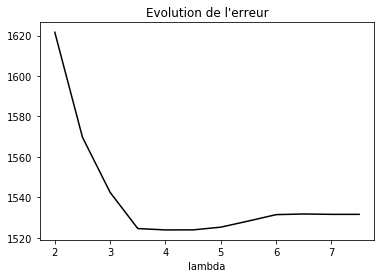

4.0
Ridge :


C:\Users\yousra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


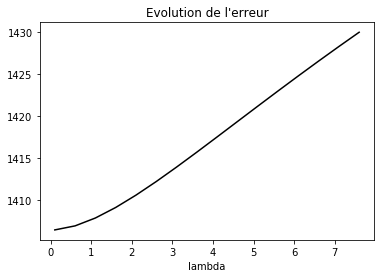

0.1
Elastic net : 


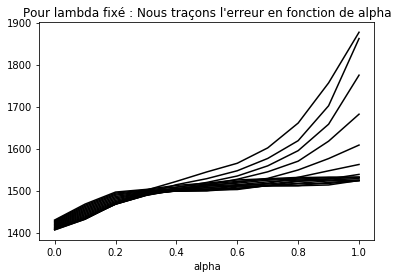

0


In [92]:
#Attention :
#     -  ICI au vu du graphique précedent nous avons choisi de changer la longueur du vecteur lambda 
#        pour la selection du modèle

# selection de model Lasso
def model_select_L(X,Y,K): 
    lamda1=arange(2,8,0.5)
    alpha=1
    err_est = [val_crois(alpha,lamda,X,Y,K) for lamda in lamda1]
    plt.title("Evolution de l'erreur")
    plt.plot(lamda1,err_est, color="black" )
    plt.xlabel('lambda')
    plt.show()
    return lamda1[argmin(err_est)] 

# selection de model Ridge
def model_select_R(X,Y,K):  
    lamda1=arange(0.1,8,0.5)
    alpha=0
    err_est = [val_crois(alpha,lamda,X,Y,K) for lamda in lamda1]
    plt.title("Evolution de l'erreur")
    plt.plot(lamda1,err_est, color="black" )
    plt.xlabel('lambda')
    plt.show()
    return lamda1[argmin(err_est)]


# selection de model Elastic net 
def model_select_EN(X,Y,K):  
    lamda1=arange(0.1,8,0.5)
    alpha1=arange(0,1.1,0.1)
    err_est = [[val_crois(alpha,lamda,X,Y,K) for lamda in lamda1] for alpha in alpha1 ]
    plt.title("Pour lambda fixé : Nous traçons l'erreur en fonction de alpha")
    plt.plot(alpha1,err_est, color="black" )
    plt.xlabel('alpha')
    plt.show()
    return argmin(err_est)



print('Lasso : ')
print(model_select_L(X_train,Y_train,200))

print('Ridge :')

print(model_select_R(X_train,Y_train,200))

print('Elastic net : ')

print(model_select_EN(X_train,Y_train,200))


<P><U>Observation:</U><pre> Les paramètres optimaux sont : 
-   Pour Lasso : lambda = 4 
-   Pour Ridge : lambda = 0.1
-   Pour Elastic-Net : alpha = 0 et lamdba = 0.1 (soit Ridge)

</pre></P> 

<P> </P> 
<P> <B>Partie D : </B> Après avoir selectionné les paramètres optimaux pour les 3 estimateurs, nous voulons savoir lequel de ces estimateurs est le meilleur et donc celui qui fournit la meilleur prédiction sur l'échantillon test </P>


In [93]:
print('Lasso :')
print(erreur(f_pred(1,4,X_train,Y_train,X_test),Y_test))

print('Ridge :')

print(erreur(f_pred(0,0.1,X_train,Y_train,X_test),Y_test))


print('Elastic net :')
print(erreur(f_pred(0,0.1,X_train,Y_train,X_test),Y_test))



Lasso :
1424.16176395
Ridge :


C:\Users\yousra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1318.33172533
Elastic net :
1318.33172533


<P> <U>Observation:</U>  D'après la sortie de la fonction erreur nous obervons que pour notre jeu de données  Ridge est le  meilleur des estimateurs. </P>
<P> </P> 
<P> </P> 
<P> </P> 
<P> <B> Question 3 : </B> Refaire le même raisonnement avec cette fois ci :

</P>

<P><CENTER><i> n=100, p=50,  &beta;<sub>1</sub>=&beta;<sub>2</sub>=10,   &beta;<sub>3</sub>=&beta;<sub>4</sub>=5,
  &beta;<sub>5</sub>=&beta;<sub>14</sub>=1 et COV(X<sub>k,i</sub>,X<sub>k,j</sub>)=0.7<sup>|i-j|</sup></i></CENTER></P>


In [94]:
# 1 - Initialisation 
n=100
p=50
#BETA
beta=[]
beta.extend(10*ones(2))
beta.extend(5*ones(2))
beta.extend(ones(10))
beta.extend(zeros(p-14))

print(beta)
print(shape(beta))

#ETA
eta=[gauss(0,1) for i in range(n)]


# 2 - Construction de la matrice de covariance
Mcov =zeros([p,p])

for i in range(p): 
    for j in range(p):
        if  j==i :
            Mcov[i,j]=1.0
        else:  
            Mcov[i,j]=0.7**abs(i-j)

            

# 3 - Construction de X
X= multivariate_normal(zeros(p), Mcov, n).T

X=X.transpose()
X=mat(X)

print(shape(X))
print(shape(beta))
print(shape(eta))



# 4 - Calcul de Y

Y=zeros(n)
S=zeros(n)
for i in range(n): 
    for j in range(p):
        S[i]=X[i,j]*beta[j]+S[i]
    
    Y[i]=S[i]+eta[i]
    



# 5- Partage en échantillon test et échantillon d'apprentissage

X_train = X[0:int(n*2/3)]
X_test = X[int(n*2/3):n]


print("X_train et X_test")

print(shape(X_train))
print(shape(X_test))


Y_train = Y[0:int(n*2/3)]
Y_test = Y[int(n*2/3):n]

print("Y_train et Y_test")
print(shape(Y_train))
print(shape(Y_test))


[10.0, 10.0, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(50,)
(100, 50)
(50,)
(100,)
X_train et X_test
(66, 50)
(34, 50)
Y_train et Y_test
(66,)
(34,)


<P> <B> Partie A  </B> </P>

 

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


C:\Users\yousra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


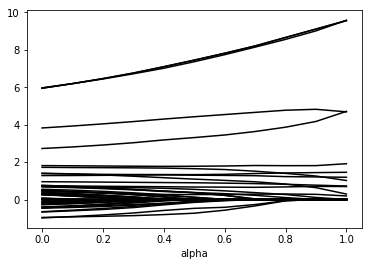

In [95]:
# 1 - Création du vecteur alpha 
alpha=arange(0,1.1,0.1)
print(alpha)


# 2 - stock des Beta
beta_coef=zeros([len(alpha),p])
for i in range(len(alpha)) : 
    est = ElasticNet(l1_ratio=alpha[i], alpha=1)
    y_pred_est=est.fit(X_train,Y_train).predict(X_test)
    beta_coef[i]=est.coef_  
    

# 3- On trace les valeurs des Betas en fonction des différentes valeurs de alpha dans  [0,1] : 
plt.plot(alpha,beta_coef[:,0], color="black" )
for i in range(p) : 
    plt.plot(alpha,beta_coef[:,i], color="black" )
    plt.xlabel("alpha")
plt.show()


<P> <B>Partie B : </B> Chemin de régularisation du Lasso </P>

C:\Users\yousra\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\yousra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


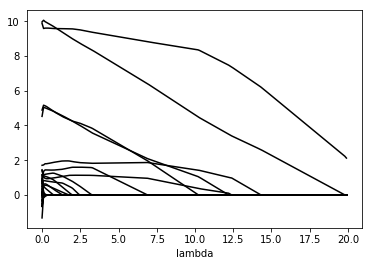

In [96]:
# 1 - Création du vecteur lambda
lamda=arange(0,20,0.1)


# 2 - stock des beta
beta_coef=zeros([len(lamda),p])

for i in range(len(lamda)) : 
    est = ElasticNet(l1_ratio=1, alpha=lamda[i])
    y_pred_est=est.fit(X_train,Y_train).predict(X_test)
    beta_coef[i]=est.coef_  
    
# 3- On trace les valeurs des Betas en fonction des différentes valeurs de lambda
for i in range(p) : 
    plt.plot(lamda,beta_coef[:,i], color="black" )
    plt.xlabel("lambda")
plt.show()

<P> </P> 
<P> <B>Partie C : </B> En utilisant seulement l'échantillon d'apprentissage, nous cherchons donc dans la suite à déterminer les  valeurs optimales des paramètres de régularisation pour les 3 méthodes.</P>

<P> <B>  <U>Application:</U>  Méthode de Validation Croisée </B> </P> 

 Lasso : 


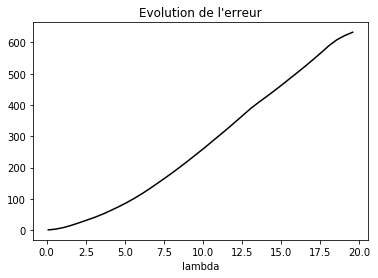

0.1
Ridge : 


C:\Users\yousra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


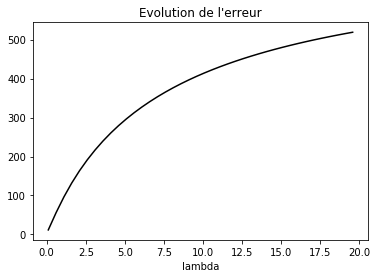

0.1
Elastic net :


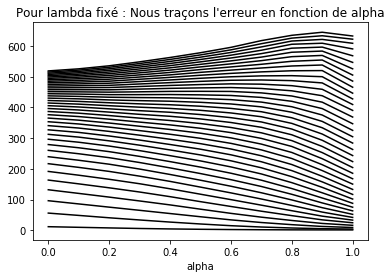

400


In [97]:

# selection de model Lasso
def model_select_L(X,Y,K): 
    lamda1=arange(0.1,20,0.5)
    alpha=1
    err_est = [val_crois(alpha,lamda,X,Y,K) for lamda in lamda1]
    plt.title("Evolution de l'erreur")
    plt.plot(lamda1,err_est, color="black" )
    plt.xlabel('lambda')
    plt.show()
    return lamda1[argmin(err_est)] 




# selection de model Ridge
def model_select_R(X,Y,K):  
    lamda1=arange(0.1,20,0.5)
    alpha=0
    err_est = [val_crois(alpha,lamda,X,Y,K) for lamda in lamda1]
    plt.title("Evolution de l'erreur")
    plt.plot(lamda1,err_est, color="black" )
    plt.xlabel('lambda')
    plt.show()
    return lamda1[argmin(err_est)]


# selection de model Elastic net
def model_select_EN(X,Y,K):  
    lamda1=arange(0.1,20,0.5)
    alpha1=arange(0,1.1,0.1)
    err_est = [[val_crois(alpha,lamda,X,Y,K) for lamda in lamda1] for alpha in alpha1 ]
    plt.title("Pour lambda fixé : Nous traçons l'erreur en fonction de alpha")
    plt.plot(alpha1,err_est, color="black" )
    plt.xlabel('alpha')
    plt.show()
    return argmin(err_est)



print(' Lasso : ')
print(model_select_L(X_train,Y_train,20))

print('Ridge : ')

print(model_select_R(X_train,Y_train,20))

print('Elastic net :')

print(model_select_EN(X_train,Y_train,20))




<P><U>Observation:</U><pre> Les paramètres optimaux sont : 
-   Pour Lasso : lambda = 0.1
-   Pour Ridge : lambda = 0.1
-   Pour Elastic-Net : alpha = 1 et lamdba = 0.1 (soit Lasso)

</pre></P> 

<P> </P> 
<P> <B>Partie D : </B> Après avoir selectionné les paramètres optimaux pour les 3 estimateurs, nous voulons savoir lequel de ces estimateurs est le meilleur et donc celui qui fournit la meilleur prédiction sur l'échantillon test </P>



In [98]:

print('Lasso : ')
print(erreur(f_pred(1,0.1,X_train,Y_train,X_test),Y_test))


print('Ridge :')

print(erreur(f_pred(0,0.1,X_train,Y_train,X_test),Y_test))

print('Elastic net')
print(erreur(f_pred(1,0.1,X_train,Y_train,X_test),Y_test))




Lasso : 
1.67242934634
Ridge :
9.27143229478
Elastic net
1.67242934634


C:\Users\yousra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<P> <U>Observation:</U>  On trouve la même moyenne d'erreur entre l'Elastic Net et le Lasso. Donc l'estimateur Elastic net/Lasso est meilleur. </P>
<P> <U>Conclusion:</U> Les estimateurs sont  perfomants d'un échantillon à un autre.  </P> 
<P> </P> 

<P><U><B> Exercice 2 :</B></U>   <B>Données réelles </B> </P>

<P> <B>Application de l'exercice 1 sur un jeu de données réel </B> </P>
<P>  Nous avons choisi le jeu de données disponible dans le lien suivant : 
https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime </P>

<P> Notre jeu de données contient 122 variables explicatives et 1 variable à expliquer et combine les données socio-économiques du recensement américain de 1990. </P>
<P><center>Ici nous cherchons à prédire la proportion de crime (Per Capita Violent Crimes) pour une ligne d'observation.</center></P>

<P>- Les 122 attributs ont été choisis s'il y avait un lien plausible avec le crime  plus l'attribut à prédire. Les variables incluses dans l'ensemble de données impliquent la communauté, comme le pourcentage de la population considérée comme urbaine, et le revenu familial médian, comme le nombre de policiers par habitant et le pourcentage d'agents affectés aux unités de drogue.</P>


<P>  - Toutes les données numériques ont été normalisées dans la plage décimale 0,00-1,00 en utilisant une méthode de binning à intervalles égaux non supervisée. Les attributs conservent donc leur distribution et leur biais. </P>



In [3]:
tab=np.loadtxt('C:\Users\Maeva\Desktop\Violences.txt')
print tab
shape (tab)

[[ 0.19        0.33        0.02       ...,  0.32        0.14        0.2       ]
 [ 0.          0.16        0.12       ...,  0.          0.19507837  0.67      ]
 [ 0.          0.42        0.49       ...,  0.          0.19507837  0.43      ]
 ..., 
 [ 0.16        0.37        0.25       ...,  0.91        0.28        0.23      ]
 [ 0.08        0.51        0.06       ...,  0.22        0.18        0.19      ]
 [ 0.2         0.78        0.14       ...,  1.          0.13        0.48      ]]


(1994L, 123L)

In [4]:
# 1 -  Initialisation 
n=1994
p=122


# Variable à prédire Y
Y=tab[:,122] 
print (Y)
# martice X (toutes les variables explicatives)
X=tab[...,0:-1]
print(X)


[ 0.2   0.67  0.43 ...,  0.23  0.19  0.48]
[[ 0.19        0.33        0.02       ...,  0.5         0.32        0.14      ]
 [ 0.          0.16        0.12       ...,  0.44043887  0.          0.19507837]
 [ 0.          0.42        0.49       ...,  0.44043887  0.          0.19507837]
 ..., 
 [ 0.16        0.37        0.25       ...,  0.          0.91        0.28      ]
 [ 0.08        0.51        0.06       ...,  0.          0.22        0.18      ]
 [ 0.2         0.78        0.14       ...,  0.5         1.          0.13      ]]


In [5]:
# 2 - partage en échatillon test et échantillon d'apprentissage
X_train = X[0:int(n*2/3)]
X_test = X[int(n*2/3):n]
Y_train = Y[0:int(n*2/3)]
Y_test = Y[int(n*2/3):n]


<P> <B>Partie A : </B> Estimer le vecteur de regression par la méthode Elastic-Net pour toutes les valeurs de &alpha; dans {0, 0.1, ... , 0.9, 1}  </P>

c:\python27\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


beta
[[ 0.00713959 -0.0016191   0.02624141 ...,  0.00266442  0.01135154
   0.00089052]
 [ 0.         -0.          0.         ...,  0.          0.          0.        ]
 [ 0.         -0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.         -0.          0.         ...,  0.          0.          0.        ]
 [ 0.         -0.          0.         ...,  0.          0.          0.        ]
 [ 0.         -0.          0.         ...,  0.          0.          0.        ]]


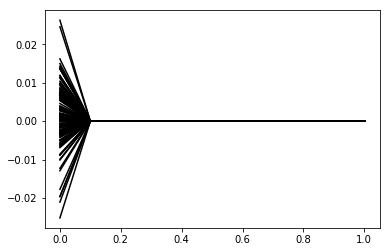

In [6]:
# 1 - Création du vecteur alpha 

alpha=arange(0,1.1,0.1)

# 2 - Stock beta  
beta_coef=zeros([len(alpha),p])
for i in range(len(alpha)) : 
    est = ElasticNet(l1_ratio=alpha[i], alpha=1)
    y_pred_est=est.fit(X_train,Y_train).predict(X_test)
    beta_coef[i]=est.coef_  

    
print('beta')

print(beta_coef)



# 3- On trace les valeurs des Betas en fonction des différentes valeurs de alpha dans  [0,1] : 
for i in range(p) : 
    plt.plot(alpha,beta_coef[:,i], color="black" )

plt.show()

 



<P> <B>Partie B : </B> Chemin de régularisation avec Lasso</P>

c:\python27\lib\site-packages\ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
c:\python27\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


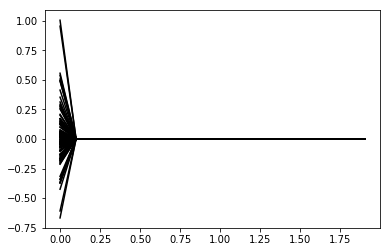

In [7]:
# 1 - Création du vecteur lambda 
lamda=arange(0,2,0.1)


# 2 - Stock beta 
beta_coef=zeros([len(lamda),p])
for i in range(len(lamda)) : 
    est = ElasticNet(l1_ratio=1, alpha=lamda[i])
    y_pred_est=est.fit(X_train,Y_train).predict(X_test)
    beta_coef[i]=est.coef_  
    

# 3- On trace les valeurs des Betas en fonction des différentes valeurs de lambda : 
for i in range(p) : 
    plt.plot(lamda,beta_coef[:,i], color="black" )

plt.show()

<P> </P> 
<P> <B>Partie C : </B> En utilisant seulement l'échantillon d'apprentissage, nous cherchons donc dans la suite à déterminer les  valeurs optimales des paramètres de régularisation pour les 3 méthodes.</P>

<P> <B>  <U>Application:</U>  Méthode de Validation Croisée </B> </P> 

 Lasso : 


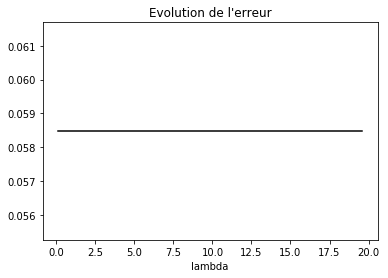

0.1
Ridge : 


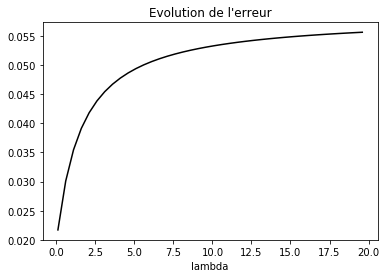

0.1


In [8]:
print(' Lasso : ')
print(model_select_L(X_train,Y_train,20))

print('Ridge : ')

print(model_select_R(X_train,Y_train,20))





Elastic net :


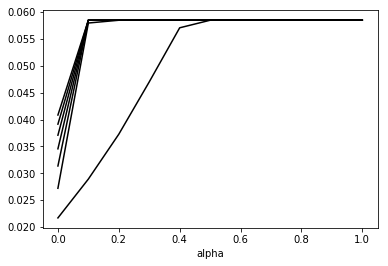

0


In [9]:
def model_select_EN(X,Y,K):  
    lamda1=arange(0.1,2,0.3)
    alpha1=arange(0,1.1,0.1)
    err_est = [[val_crois(alpha,lamda,X,Y,K) for lamda in lamda1] for alpha in alpha1 ]
    plt.plot(alpha1,err_est, color="black" )
    plt.xlabel('alpha')
    plt.show()
    return argmin(err_est)

print('Elastic net :')
print(model_select_EN(X_train,Y_train,20))



<P><U>Observation:</U><pre> Les paramètres optimaux sont : 
-   Pour Lasso : lambda = 0.1
-   Pour Ridge : lambda = 0.1
-   Pour Elastic-Net : alpha = 0 et lamdba = 0.1 (soit Ridge)

Remarque: Avec Lasso l'erreur est statique à 0.0585, tandis que pour Ridge on a une évolution croissante puis se stabilise à 0.55.

</pre></P> 

<P> </P> 
<P> <B>Partie D : </B> Après avoir selectionné les paramètres optimaux pour les 3 estimateurs, nous voulons savoir lequel de ces estimateurs est le meilleur et donc celui qui fournit la meilleur prédiction sur l'échantillon test. </P>

In [10]:

print('Lasso : ')
print(erreur(f_pred(1,0.1,X_train,Y_train,X_test),Y_test))


print('Ridge :')

print(erreur(f_pred(0,0.1,X_train,Y_train,X_test),Y_test))

print('Elastic net')
print(erreur(f_pred(0,0.1,X_train,Y_train,X_test),Y_test))



Lasso : 
0.046193953026
Ridge :
0.0173582971109
Elastic net
0.0173582971109


<P> <U>Conclusion:</U>  Avec une erreur moyenne de 0.017,l'estimateur Ridge est meilleur pour la prédiction du Per Capita Violent Crimes. </P>
<P> </P> 
<P> </P>